In [43]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as opt
import os

In [1]:
%%time

try:
    import os, sys
    sys.path.insert(1, os.path.abspath('/home/runner/work/psi4/psi4/code/objdir/stage//usr/local/psi4/lib/'))
except ImportError:
    pass

# This is the important part
import psi4

CPU times: user 417 ms, sys: 197 ms, total: 614 ms
Wall time: 2.09 s


In [3]:
%%time

psi4.set_memory('500 MB')

h2o = psi4.geometry("""
O
H 1 0.96
H 1 0.96 2 104.5
""")

psi4.energy('scf/cc-pvdz')


  Memory set to 476.837 MiB by Python driver.

Scratch directory: /tmp/

*** tstart() called on cs025.hpc.nyu.edu
*** at Tue Nov 15 14:48:20 2022

   => Loading Basis Set <=

    Name: CC-PVDZ
    Role: ORBITAL
    Keyword: BASIS
    atoms 1   entry O          line   198 file /ext3/miniconda3/share/psi4/basis/cc-pvdz.gbs 
    atoms 2-3 entry H          line    22 file /ext3/miniconda3/share/psi4/basis/cc-pvdz.gbs 


         ---------------------------------------------------------
                                   SCF
               by Justin Turney, Rob Parrish, Andy Simmonett
                          and Daniel G. A. Smith
                              RHF Reference
                        1 Threads,    476 MiB Core
         ---------------------------------------------------------

  ==> Geometry <==

    Molecular point group: c2v
    Full point group: C2v

    Geometry (in Angstrom), charge = 0, multiplicity = 1:

       Center              X                  Y                

-76.0266327350902

In [10]:
%%time

R = 1.075
A = 133.93

ch2 = psi4.geometry("""
0 3
C
H 1 {0}
H 1 {0} 2 {1}
""".format(R, A)
)

psi4.set_options({'reference': 'uhf'})
psi4.energy('scf/6-31g**')

	Removing binary optimization data file.
	Cleaning optimization helper files.

Scratch directory: /tmp/

*** tstart() called on cs025.hpc.nyu.edu
*** at Tue Nov 15 15:04:03 2022

   => Loading Basis Set <=

    Name: 6-31G**
    Role: ORBITAL
    Keyword: BASIS
    atoms 1   entry C          line   115 file /ext3/miniconda3/share/psi4/basis/6-31gss.gbs 
    atoms 2-3 entry H          line    44 file /ext3/miniconda3/share/psi4/basis/6-31gss.gbs 


         ---------------------------------------------------------
                                   SCF
               by Justin Turney, Rob Parrish, Andy Simmonett
                          and Daniel G. A. Smith
                              UHF Reference
                        1 Threads,    476 MiB Core
         ---------------------------------------------------------

  ==> Geometry <==

    Molecular point group: c2v
    Full point group: C2v

    Geometry (in Angstrom), charge = 0, multiplicity = 3:

       Center              X    

-38.925334628955014

In [11]:
psi4.set_options({'reference': 'rhf'})
psi4.optimize('scf/cc-pvdz', molecule=h2o)


Scratch directory: /tmp/
gradient() will perform analytic gradient computation.

*** tstart() called on cs025.hpc.nyu.edu
*** at Tue Nov 15 15:04:56 2022

   => Loading Basis Set <=

    Name: CC-PVDZ
    Role: ORBITAL
    Keyword: BASIS
    atoms 1   entry O          line   198 file /ext3/miniconda3/share/psi4/basis/cc-pvdz.gbs 
    atoms 2-3 entry H          line    22 file /ext3/miniconda3/share/psi4/basis/cc-pvdz.gbs 


         ---------------------------------------------------------
                                   SCF
               by Justin Turney, Rob Parrish, Andy Simmonett
                          and Daniel G. A. Smith
                              RHF Reference
                        1 Threads,    476 MiB Core
         ---------------------------------------------------------

  ==> Geometry <==

    Molecular point group: c2v
    Full point group: C2v

    Geometry (in Angstrom), charge = 0, multiplicity = 1:

       Center              X                  Y        

-76.0270327293759

e-05 o    8.76e-04 *    5.08e-04 o  ~
  ---------------------------------------------------------------------------------------------


  **** Optimization is complete! (in 1 steps) ****

  ==> Optimization Summary <==

  Measures of convergence in internal coordinates in au.
  --------------------------------------------------------------------------------------------------------------- ~
   Step         Total Energy             Delta E       MAX Force       RMS Force        MAX Disp        RMS Disp  ~
  --------------------------------------------------------------------------------------------------------------- ~
      1     -76.027032729376    -76.027032729376      0.00014019      0.00008488      0.00087619      0.00050775  ~
  --------------------------------------------------------------------------------------------------------------- ~

	Writing optimization data to binary file.
	Final energy is    -76.0270327293759
	Final (previous) structure:
	Cartesian Geometry (in Angstrom

In [12]:
psi4.set_options({'reference': 'uhf'})
psi4.optimize('scf/cc-pvdz', molecule=ch2)

	Removing binary optimization data file.
	Cleaning optimization helper files.

Scratch directory: /tmp/
gradient() will perform analytic gradient computation.

*** tstart() called on cs025.hpc.nyu.edu
*** at Tue Nov 15 15:05:18 2022

   => Loading Basis Set <=

    Name: CC-PVDZ
    Role: ORBITAL
    Keyword: BASIS
    atoms 1   entry C          line   138 file /ext3/miniconda3/share/psi4/basis/cc-pvdz.gbs 
    atoms 2-3 entry H          line    22 file /ext3/miniconda3/share/psi4/basis/cc-pvdz.gbs 


         ---------------------------------------------------------
                                   SCF
               by Justin Turney, Rob Parrish, Andy Simmonett
                          and Daniel G. A. Smith
                              UHF Reference
                        1 Threads,    476 MiB Core
         ---------------------------------------------------------

  ==> Geometry <==

    Molecular point group: c2v
    Full point group: C2v

    Geometry (in Angstrom), charge =

  ==> Integral Setup <==

  DFHelper Memory: AOs need 0.001 GiB; user supplied 0.349 GiB. Using in-core AOs.

  ==> MemDFJK: Density-Fitted J/K Matrices <==

    J tasked:                   Yes
    K tasked:                   Yes
    wK tasked:                   No
    OpenMP threads:               1
    Memory [MiB]:               357
    Algorithm:                 Core
    Schwarz Cutoff:           1E-12
    Mask sparsity (%):       0.0000
    Fitting Condition:        1E-10

   => Auxiliary Basis Set <=

  Basis Set: (CC-PVDZ AUX)
    Blend: CC-PVDZ-JKFIT
    Number of shells: 42
    Number of basis functions: 116
    Number of Cartesian functions: 131
    Spherical Harmonics?: true
    Max angular momentum: 3

  Minimum eigenvalue in the overlap matrix is 2.9199639077E-02.
  Reciprocal condition number of the overlap matrix is 9.1284072988E-03.
    Using symmetric orthogonalization.

  ==> Pre-Iterations <==

  SCF Guess: Orbitals guess was supplied from a previous computation.

  

	    H     0.0000000000   0.9856602459   0.3754801883
			--------------------------
			 OPTKING Finished Execution 
			--------------------------

    Structure for next step:
    Molecular point group: c2v
    Full point group: C2v

    Geometry (in Angstrom), charge = 0, multiplicity = 3:

    C       
    H             1    1.081067
    H             1    1.081067      2  131.495933


Scratch directory: /tmp/
gradient() will perform analytic gradient computation.

*** tstart() called on cs025.hpc.nyu.edu
*** at Tue Nov 15 15:05:18 2022

   => Loading Basis Set <=

    Name: CC-PVDZ
    Role: ORBITAL
    Keyword: BASIS
    atoms 1   entry C          line   138 file /ext3/miniconda3/share/psi4/basis/cc-pvdz.gbs 
    atoms 2-3 entry H          line    22 file /ext3/miniconda3/share/psi4/basis/cc-pvdz.gbs 


         ---------------------------------------------------------
                                   SCF
               by Justin Turney, Rob Parrish, Andy Simmonett
              

-38.92682815376834

	---Fragment 1 Intrafragment Coordinates---
	 - Coordinate -           - BOHR/RAD -       - ANG/DEG -
	 R(1,2)           =         2.042921	       1.081067
	 R(1,3)           =         2.042921	       1.081067
	 B(2,1,3)         =         2.295037	     131.495933

	Current energy   :       -38.9268281538

	Energy change for the previous step:
		Projected    :        -0.0000191517
		Actual       :        -0.0000174122
	Energy ratio indicates good step: Trust radius increased to 1.000e+00.


	Performing BFGS update.
	Previous computed or guess Hessian on step 1.
	Steps to be used in Hessian update: 2 1
	Taking RFO optimization step.
	Going to follow RFO solution 1.
	Using RFO vector 1.
	Norm of target step-size    0.00102
	Projected energy change by RFO approximation:        -0.0000003351

	Back-transformation to cartesian coordinates...
	Successfully converged to displaced geometry.

	--- Internal Coordinate Step in ANG or DEG, aJ/ANG or AJ/DEG ---
	 ------------------------------------

In [16]:
%%time

dimer = psi4.geometry("""
0 1
C   0.000000  -0.667578  -2.124659
C   0.000000   0.667578  -2.124659
H   0.923621  -1.232253  -2.126185
H  -0.923621  -1.232253  -2.126185
H  -0.923621   1.232253  -2.126185
H   0.923621   1.232253  -2.126185
--
0 1
C   0.000000   0.000000   2.900503
C   0.000000   0.000000   1.693240
H   0.000000   0.000000   0.627352
H   0.000000   0.000000   3.963929
units angstrom
""")

CPU times: user 1.17 ms, sys: 16 µs, total: 1.19 ms
Wall time: 1.2 ms


In [18]:
%%time

psi4.set_options({'scf_type': 'df',
                  'freeze_core': 'true'})

psi4.energy('sapt0/jun-cc-pvdz', molecule=dimer)


Scratch directory: /tmp/
  SAPT does not make use of molecular symmetry, further calculations in C1 point group.
   => Loading Basis Set <=

    Name: JUN-CC-PVDZ
    Role: ORBITAL
    Keyword: BASIS
    atoms 1-2, 7-8  entry C          line   164 file /ext3/miniconda3/share/psi4/basis/jun-cc-pvdz.gbs 
    atoms 3-6, 9-10 entry H          line    36 file /ext3/miniconda3/share/psi4/basis/jun-cc-pvdz.gbs 

   => Loading Basis Set <=

    Name: JUN-CC-PVDZ
    Role: ORBITAL
    Keyword: BASIS
    atoms 1-2, 7-8  entry C          line   164 file /ext3/miniconda3/share/psi4/basis/jun-cc-pvdz.gbs 
    atoms 3-6, 9-10 entry H          line    36 file /ext3/miniconda3/share/psi4/basis/jun-cc-pvdz.gbs 


  //>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>//
  //              Dimer HF             //
  //<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<//


*** tstart() called on cs025.hpc.nyu.edu
*** at Tue Nov 15 15:07:56 2022

   => Loading Basis Set <=

    Name: JUN-CC-PVDZ
    Role: ORBITAL
    Keyword: BASIS
    

  Basis Set: JUN-CC-PVDZ
    Blend: JUN-CC-PVDZ
    Number of shells: 50
    Number of basis functions: 102
    Number of Cartesian functions: 106
    Spherical Harmonics?: true
    Max angular momentum: 2

   => Loading Basis Set <=

    Name: (JUN-CC-PVDZ AUX)
    Role: JKFIT
    Keyword: DF_BASIS_SCF
    atoms 1-2, 7-8  entry C          line   146 file /ext3/miniconda3/share/psi4/basis/jun-cc-pvdz-jkfit.gbs 
    atoms 3-6, 9-10 entry H          line    70 file /ext3/miniconda3/share/psi4/basis/jun-cc-pvdz-jkfit.gbs 

  ==> Integral Setup <==

  ==> DiskDFJK: Density-Fitted J/K Matrices <==

    J tasked:                  Yes
    K tasked:                  Yes
    wK tasked:                  No
    OpenMP threads:              1
    Integrals threads:           1
    Memory [MiB]:              357
    Algorithm:                Core
    Integral Cache:           LOAD
    Schwarz Cutoff:          1E-12
    Fitting Condition:       1E-10

   => Auxiliary Basis Set <=

  Basis Set: (JUN-


*** tstop() called on cs025.hpc.nyu.edu at Tue Nov 15 15:07:59 2022
Module time:
	user time   =       1.18 seconds =       0.02 minutes
	system time =       0.03 seconds =       0.00 minutes
	total time  =          1 seconds =       0.02 minutes
Total time:
	user time   =      18.89 seconds =       0.31 minutes
	system time =       0.59 seconds =       0.01 minutes
	total time  =       1179 seconds =      19.65 minutes

  //>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>//
  //            Monomer B HF           //
  //<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<//


*** tstart() called on cs025.hpc.nyu.edu
*** at Tue Nov 15 15:07:59 2022

   => Loading Basis Set <=

    Name: JUN-CC-PVDZ
    Role: ORBITAL
    Keyword: BASIS
    atoms 1-2, 7-8  entry C          line   164 file /ext3/miniconda3/share/psi4/basis/jun-cc-pvdz.gbs 
    atoms 3-6, 9-10 entry H          line    36 file /ext3/miniconda3/share/psi4/basis/jun-cc-pvdz.gbs 


         ---------------------------------------------------------
         


*** tstop() called on cs025.hpc.nyu.edu at Tue Nov 15 15:08:00 2022
Module time:
	user time   =       1.18 seconds =       0.02 minutes
	system time =       0.02 seconds =       0.00 minutes
	total time  =          1 seconds =       0.02 minutes
Total time:
	user time   =      20.08 seconds =       0.33 minutes
	system time =       0.62 seconds =       0.01 minutes
	total time  =       1180 seconds =      19.67 minutes
  Constructing Basis Sets for SAPT...

   => Loading Basis Set <=

    Name: (JUN-CC-PVDZ AUX)
    Role: RIFIT
    Keyword: DF_BASIS_SAPT
    atoms 1-2, 7-8  entry C          line   100 file /ext3/miniconda3/share/psi4/basis/jun-cc-pvdz-ri.gbs 
    atoms 3-6, 9-10 entry H          line    30 file /ext3/miniconda3/share/psi4/basis/jun-cc-pvdz-ri.gbs 

   => Loading Basis Set <=

    Name: (JUN-CC-PVDZ AUX)
    Role: JKFIT
    Keyword: DF_BASIS_ELST
    atoms 1-2, 7-8  entry C          line   146 file /ext3/miniconda3/share/psi4/basis/jun-cc-pvdz-jkfit.gbs 
    atoms 3-6,

-0.0022355918478786816

In [46]:
%%time


Ar2_geometry = """
Ar
--
Ar 1 {0}
"""

Rvals = np.arange(3.5, 6.0,0.25)

psi4.set_options({'freeze_core': 'true'})

# Initialize a blank dictionary of counterpoise corrected energies
# (Need this for the syntax below to work)

ecp = {}

for R in Rvals:
    Ar2 = psi4.geometry(Ar2_geometry.format(R))
    ecp[R] = psi4.energy('ccsd(t)/aug-cc-pvdz', bsse_type='cp', molecule=Ar2)

# Prints to screen
print("CP-corrected CCSD(T)/aug-cc-pVDZ Interaction Energies\n\n")
print("          R [Ang]                 E_int [kcal/mol]       ")
print("---------------------------------------------------------")
for R in Rvals:
    e = ecp[R] * psi4.constants.hartree2kcalmol
    print("            {:3.1f}                        {:1.6f}".format(R, e))

# Prints to output.dat
psi4.core.print_out("CP-corrected CCSD(T)/aug-cc-pVDZ Interaction Energies\n\n")
psi4.core.print_out("          R [Ang]                 E_int [kcal/mol]       \n")
psi4.core.print_out("---------------------------------------------------------\n")
for R in Rvals:
    e = ecp[R] * psi4.constants.hartree2kcalmol
    psi4.core.print_out("            {:3.1f}                        {:1.6f}\n".format(R, e))


Scratch directory: /tmp/

  //>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>//
  // ManyBody Setup: N-Body Levels [1, 2]//
  //<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<//

        Number of 1-body computations:     2
        Number of 2-body computations:     1

    -----------------------------------------------------------------------
          Psi4: An Open-Source Ab Initio Electronic Structure Package
                               Psi4 1.7a1.dev44 

                         Git: Rev {master} 2792bff 


    D. G. A. Smith, L. A. Burns, A. C. Simmonett, R. M. Parrish,
    M. C. Schieber, R. Galvelis, P. Kraus, H. Kruse, R. Di Remigio,
    A. Alenaizan, A. M. James, S. Lehtola, J. P. Misiewicz, M. Scheurer,
    R. A. Shaw, J. B. Schriber, Y. Xie, Z. L. Glick, D. A. Sirianni,
    J. S. O'Brien, J. M. Waldrop, A. Kumar, E. G. Hohenstein,
    B. P. Pritchard, B. R. Brooks, H. F. Schaefer III, A. Yu. Sokolov,
    K. Patkowski, A. E. DePrince III, U. Bozkaya, R. A. King,
    F. A. Evangelista, J. M. 

  ----     ---------------------    ---------   ----------  ----------  ----------   --------
     0        -0.154396444543343    0.000e+00    0.000000    0.000000    0.000000    0.000000
     1        -0.164393966298501    2.417e-02    0.004038    0.000000    0.000000    0.000000
     2        -0.166113488791566    6.303e-03    0.004802    0.000000    0.000000    0.000000
     3        -0.166269654563853    1.435e-03    0.005205    0.000000    0.000000    0.000000
     4        -0.166260035249442    2.423e-04    0.005245    0.000000    0.000000    0.000000
     5        -0.166257370857502    6.301e-05    0.005258    0.000000    0.000000    0.000000
     6        -0.166257408957176    1.318e-05    0.005260    0.000000    0.000000    0.000000
     7        -0.166257488768351    3.729e-06    0.005260    0.000000    0.000000    0.000000
     8        -0.166257498840686    8.719e-07    0.005260    0.000000    0.000000    0.000000
     9        -0.166257500085771    2.241e-07    0.005260   

     B1        12      12 
     B2        12      12 
   -------------------------
    Total      54      54
   -------------------------

  ==> Iterations <==

                           Total Energy        Delta E     RMS |[F,P]|

   @DF-UHF iter SAD:  -526.79237813387977   -5.26792e+02   0.00000e+00 
   @DF-UHF iter   1:  -526.80076239020059   -8.38426e-03   7.27730e-04 ADIIS/DIIS
   @DF-UHF iter   2:  -526.80099837134912   -2.35981e-04   1.93068e-04 ADIIS/DIIS
   @DF-UHF iter   3:  -526.80101317564367   -1.48043e-05   4.64190e-06 DIIS
   @DF-UHF iter   4:  -526.80101319192681   -1.62831e-08   7.06026e-07 DIIS
   @DF-UHF iter   5:  -526.80101319253879   -6.11976e-10   3.44515e-08 DIIS
   @DF-UHF iter   6:  -526.80101319254061   -1.81899e-12   7.92401e-09 DIIS
  Energy and wave function converged.


  ==> Post-Iterations <==

   @Spin Contamination Metric:   0.000000000E+00
   @S^2 Expected:                0.000000000E+00
   @S^2 Observed:                0.000000000E+00
   @S   Expec

	Total:                                     0.096 (MW) /      0.768 (MB)

	Size of irrep 0 of <iA|bC> integrals:      0.041 (MW) /      0.326 (MB)
	Size of irrep 1 of <iA|bC> integrals:      0.010 (MW) /      0.082 (MB)
	Size of irrep 2 of <iA|bC> integrals:      0.022 (MW) /      0.180 (MB)
	Size of irrep 3 of <iA|bC> integrals:      0.022 (MW) /      0.180 (MB)
	Total:                                     0.096 (MW) /      0.768 (MB)

	Size of irrep 0 of tIjAb amplitudes:       0.004 (MW) /      0.032 (MB)
	Size of irrep 1 of tIjAb amplitudes:       0.001 (MW) /      0.006 (MB)
	Size of irrep 2 of tIjAb amplitudes:       0.002 (MW) /      0.016 (MB)
	Size of irrep 3 of tIjAb amplitudes:       0.002 (MW) /      0.016 (MB)
	Total:                                     0.009 (MW) /      0.069 (MB)

	Nuclear Rep. energy          =      0.00000000000000
	SCF energy                   =   -526.80101319254061
	One-electron energy          =    -35.62980647254824
	Two-electron (AA) energy     = 


    -----------------------------------------------------------------------
          Psi4: An Open-Source Ab Initio Electronic Structure Package
                               Psi4 1.7a1.dev44 

                         Git: Rev {master} 2792bff 


    D. G. A. Smith, L. A. Burns, A. C. Simmonett, R. M. Parrish,
    M. C. Schieber, R. Galvelis, P. Kraus, H. Kruse, R. Di Remigio,
    A. Alenaizan, A. M. James, S. Lehtola, J. P. Misiewicz, M. Scheurer,
    R. A. Shaw, J. B. Schriber, Y. Xie, Z. L. Glick, D. A. Sirianni,
    J. S. O'Brien, J. M. Waldrop, A. Kumar, E. G. Hohenstein,
    B. P. Pritchard, B. R. Brooks, H. F. Schaefer III, A. Yu. Sokolov,
    K. Patkowski, A. E. DePrince III, U. Bozkaya, R. A. King,
    F. A. Evangelista, J. M. Turney, T. D. Crawford, C. D. Sherrill,
    J. Chem. Phys. 152(18) 184108 (2020). https://doi.org/10.1063/5.0006002

                            Additional Code Authors
    E. T. Seidl, C. L. Janssen, E. F. Valeev, M. L. Leininger,
    J. F. Gonthier

  LUNO+3 :    4B2g 0.0000000


Computation Completed


Properties will be evaluated at   0.000000,   0.000000,   0.000000 [a0]

Properties computed using the SCF density matrix


 Multipole Moments:

 ------------------------------------------------------------------------------------
     Multipole            Electronic (a.u.)      Nuclear  (a.u.)        Total (a.u.)
 ------------------------------------------------------------------------------------

 L = 1.  Multiply by 2.5417464519 to convert [e a0] to [Debye]
 Dipole X            :          0.0000000            0.0000000            0.0000000
 Dipole Y            :          0.0000000            0.0000000            0.0000000
 Dipole Z            :          0.0000000           -0.0000000           -0.0000000
 Magnitude           :                                                    0.0000000

 ------------------------------------------------------------------------------------

*** tstop() called on cs025.hpc.nyu.edu at Tue Nov 15 1


    -----------------------------------------------------------------------
          Psi4: An Open-Source Ab Initio Electronic Structure Package
                               Psi4 1.7a1.dev44 

                         Git: Rev {master} 2792bff 


    D. G. A. Smith, L. A. Burns, A. C. Simmonett, R. M. Parrish,
    M. C. Schieber, R. Galvelis, P. Kraus, H. Kruse, R. Di Remigio,
    A. Alenaizan, A. M. James, S. Lehtola, J. P. Misiewicz, M. Scheurer,
    R. A. Shaw, J. B. Schriber, Y. Xie, Z. L. Glick, D. A. Sirianni,
    J. S. O'Brien, J. M. Waldrop, A. Kumar, E. G. Hohenstein,
    B. P. Pritchard, B. R. Brooks, H. F. Schaefer III, A. Yu. Sokolov,
    K. Patkowski, A. E. DePrince III, U. Bozkaya, R. A. King,
    F. A. Evangelista, J. M. Turney, T. D. Crawford, C. D. Sherrill,
    J. Chem. Phys. 152(18) 184108 (2020). https://doi.org/10.1063/5.0006002

                            Additional Code Authors
    E. T. Seidl, C. L. Janssen, E. F. Valeev, M. L. Leininger,
    J. F. Gonthier

       4B1     0.165966     9A1     0.247662    10A1     0.503149  
       5B2     0.540871     5B1     0.540871     1A2     0.541403  
      11A1     0.541403    12A1     0.556885     6B1     0.578237  
       6B2     0.578237    13A1     0.607416    14A1     0.796606  
       2A2     0.796606     7B1     0.805421     7B2     0.805421  
      15A1     0.844317     8B1     0.974246     8B2     0.974246  
      16A1     1.012859    17A1     1.366895    18A1     1.610342  
       3A2     1.610342     9B2     1.616659     9B1     1.616659  
      19A1     1.666885    20A1     1.927869    10B1     2.440837  
      10B2     2.440837    21A1     2.456112    22A1     3.103958  
       4A2     3.103958    11B1     3.109147    11B2     3.109147  
      23A1     3.152497    24A1     9.191757    12B1    27.720292  
      12B2    27.720292    25A1    27.735120    26A1   176.824359  

    Final Occupation by Irrep:
             A1    A2    B1    B2 
    DOCC [     5,    0,    2,    2 ]
    SOCC [  

  ----     ---------------------    ---------   ----------  ----------  ----------   --------
     0        -0.154377670887862    0.000e+00    0.000000    0.000000    0.000000    0.000000
     1        -0.164375174144925    2.417e-02    0.004036    0.000000    0.000000    0.000000
     2        -0.166094591359591    6.302e-03    0.004801    0.000000    0.000000    0.000000
     3        -0.166250456874610    1.432e-03    0.005203    0.000000    0.000000    0.000000
     4        -0.166240697378032    2.406e-04    0.005243    0.000000    0.000000    0.000000
     5        -0.166238073892694    6.193e-05    0.005257    0.000000    0.000000    0.000000
     6        -0.166238134191316    1.202e-05    0.005258    0.000000    0.000000    0.000000
     7        -0.166238208472178    3.653e-06    0.005258    0.000000    0.000000    0.000000
     8        -0.166238217916483    8.450e-07    0.005258    0.000000    0.000000    0.000000
     9        -0.166238219138503    2.205e-07    0.005258   

     B1        12      12 
     B2        12      12 
   -------------------------
    Total      54      54
   -------------------------

  ==> Iterations <==

                           Total Energy        Delta E     RMS |[F,P]|

   @DF-UHF iter SAD:  -526.79237819894706   -5.26792e+02   0.00000e+00 
   @DF-UHF iter   1:  -526.80075769381142   -8.37949e-03   7.27222e-04 ADIIS/DIIS
   @DF-UHF iter   2:  -526.80099373424400   -2.36040e-04   1.93006e-04 ADIIS/DIIS
   @DF-UHF iter   3:  -526.80100854384023   -1.48096e-05   4.70077e-06 DIIS
   @DF-UHF iter   4:  -526.80100856076388   -1.69237e-08   7.16844e-07 DIIS
   @DF-UHF iter   5:  -526.80100856140382   -6.39943e-10   4.56925e-08 DIIS
   @DF-UHF iter   6:  -526.80100856140643   -2.61480e-12   9.61428e-09 DIIS
  Energy and wave function converged.


  ==> Post-Iterations <==

   @Spin Contamination Metric:   2.486899575E-14
   @S^2 Expected:                0.000000000E+00
   @S^2 Observed:                2.486899575E-14
   @S   Expec

     9        -0.166238219138523    2.205e-07    0.005258    0.000000    0.000000    0.000000
    10        -0.166238219989043    7.032e-08    0.005258    0.000000    0.000000    0.000000

    Iterations converged.


    Largest TIA Amplitudes:
              1   2        -0.0047272702
              2  26         0.0045350273
              3  36         0.0045350273
              2  25         0.0028285002
              3  35         0.0028285002
              0  11         0.0024969488
              2  30        -0.0022284883
              3  40        -0.0022284883
              1   0         0.0020529510
              1  10         0.0018533581

    Largest Tia Amplitudes:
              1   2        -0.0047272702
              2  26         0.0045350273
              3  36         0.0045350273
              2  25         0.0028285002
              3  35         0.0028285002
              0  11         0.0024969488
              2  30        -0.0022284883
              3  40        -0

Properties will be evaluated at   0.000000,   0.000000,   0.000000 [a0]

Properties computed using the SCF density matrix


 Multipole Moments:

 ------------------------------------------------------------------------------------
     Multipole            Electronic (a.u.)      Nuclear  (a.u.)        Total (a.u.)
 ------------------------------------------------------------------------------------

 L = 1.  Multiply by 2.5417464519 to convert [e a0] to [Debye]
 Dipole X            :          0.0000000            0.0000000            0.0000000
 Dipole Y            :          0.0000000            0.0000000            0.0000000
 Dipole Z            :          0.0000000           -0.0000000           -0.0000000
 Magnitude           :                                                    0.0000000

 ------------------------------------------------------------------------------------

*** tstop() called on cs025.hpc.nyu.edu at Tue Nov 15 15:50:25 2022
Module time:
	user time   =       0.54 sec

    Memory (Mbytes) =     500.0
    Maxiter         =     50
    R_Convergence   =     1.0e-07
    E_Convergence   =     1.0e-06
    Restart         =     Yes
    DIIS            =     Yes
    AO Basis        =     NONE
    ABCD            =     NEW
    Cache Level     =     2
    Cache Type      =     LRU
    Print Level     =     1
    Num. of threads =     1
    # Amps to Print =     10
    Print MP2 Amps? =     No
    Analyze T2 Amps =     No
    Print Pair Ener =     No
    Local CC        =     No
    SCS-MP2         =     False
    SCSN-MP2        =     False
    SCS-CCSD        =     False

MP2 correlation energy -0.3093825839718698
                Solving CC Amplitude Equations
                ------------------------------
  Iter             Energy              RMS        T1Diag      D1Diag    New D1Diag    D2Diag
  ----     ---------------------    ---------   ----------  ----------  ----------   --------
     0        -0.309382583971870    0.000e+00    0.000000    0.000000 

    J. F. Gonthier, R. M. Richard, H. R. McAlexander, M. Saitow, X. Wang,
    P. Verma, M. H. Lechner, and A. Jiang

             Previous Authors, Complete List of Code Contributors,
                       and Citations for Specific Modules
    https://github.com/psi4/psi4/blob/master/codemeta.json
    https://github.com/psi4/psi4/graphs/contributors
    http://psicode.org/psi4manual/master/introduction.html#citing-psifour

    -----------------------------------------------------------------------


    Psi4 started on: Tuesday, 15 November 2022 02:37PM

    Process ID: 1281394
    Host:       cs025.hpc.nyu.edu
    PSIDATADIR: /ext3/miniconda3/share/psi4
    Memory:     476.8 MiB
    Threads:    1
    
  ==> Input QCSchema <==

--------------------------------------------------------------------------
{'driver': 'energy',
 'extras': {'psiapi': True, 'wfn_qcvars_only': True},
 'id': None,
 'keywords': {'DF_INTS_IO': 'NONE',
              'FREEZE_CORE': 'TRUE',
              'INTS_TOLE

	Size of irrep 1 of <AB|CD> integrals:      0.034 (MW) /      0.271 (MB)
	Size of irrep 2 of <AB|CD> integrals:      0.062 (MW) /      0.500 (MB)
	Size of irrep 3 of <AB|CD> integrals:      0.062 (MW) /      0.500 (MB)
	Total:                                     0.252 (MW) /      2.020 (MB)

	Size of irrep 0 of <ab|cd> integrals:      0.094 (MW) /      0.749 (MB)
	Size of irrep 1 of <ab|cd> integrals:      0.034 (MW) /      0.271 (MB)
	Size of irrep 2 of <ab|cd> integrals:      0.062 (MW) /      0.500 (MB)
	Size of irrep 3 of <ab|cd> integrals:      0.062 (MW) /      0.500 (MB)
	Total:                                     0.252 (MW) /      2.020 (MB)

	Size of irrep 0 of <Ab|Cd> integrals:      0.432 (MW) /      3.453 (MB)
	Size of irrep 1 of <Ab|Cd> integrals:      0.135 (MW) /      1.083 (MB)
	Size of irrep 2 of <Ab|Cd> integrals:      0.250 (MW) /      2.000 (MB)
	Size of irrep 3 of <Ab|Cd> integrals:      0.250 (MW) /      2.000 (MB)
	Total:                                     1.067


    -----------------------------------------------------------------------
          Psi4: An Open-Source Ab Initio Electronic Structure Package
                               Psi4 1.7a1.dev44 

                         Git: Rev {master} 2792bff 


    D. G. A. Smith, L. A. Burns, A. C. Simmonett, R. M. Parrish,
    M. C. Schieber, R. Galvelis, P. Kraus, H. Kruse, R. Di Remigio,
    A. Alenaizan, A. M. James, S. Lehtola, J. P. Misiewicz, M. Scheurer,
    R. A. Shaw, J. B. Schriber, Y. Xie, Z. L. Glick, D. A. Sirianni,
    J. S. O'Brien, J. M. Waldrop, A. Kumar, E. G. Hohenstein,
    B. P. Pritchard, B. R. Brooks, H. F. Schaefer III, A. Yu. Sokolov,
    K. Patkowski, A. E. DePrince III, U. Bozkaya, R. A. King,
    F. A. Evangelista, J. M. Turney, T. D. Crawford, C. D. Sherrill,
    J. Chem. Phys. 152(18) 184108 (2020). https://doi.org/10.1063/5.0006002

                            Additional Code Authors
    E. T. Seidl, C. L. Janssen, E. F. Valeev, M. L. Leininger,
    J. F. Gonthier

	Semicanonical        = false
	Reference            = UHF
	Print Level          = 1

	IRREP	# MOs	# FZDC	# DOCC	# SOCC	# VIRT	# FZVR
	-----	-----	------	------	------	------	------
	 A1	   26	    3	    2	    0	    21	    0
	 A2	   4	    0	    0	    0	    4	    0
	 B1	   12	    1	    1	    0	    10	    0
	 B2	   12	    1	    1	    0	    10	    0
	Transforming integrals...
	IWL integrals will be deleted.
	(OO|OO)...
	Presorting SO-basis two-electron integrals.
	Sorting File: SO Ints (nn|nn) nbuckets = 1
	Constructing frozen core operators
	Starting AA/AB first half-transformation.
	Sorting AA/AB half-transformed integrals.
	Starting BB first half-transformation.
	Sorting BB half-transformed integrals.
	First half integral transformation complete.
	Starting AA second half-transformation.
	Starting AB second half-transformation.
	Starting BB second half-transformation.
	Two-electron integral transformation complete.
	(OO|OV)...
	Starting AA second half-transformation.
	Starting AB second h


    -----------------------------------------------------------------------
          Psi4: An Open-Source Ab Initio Electronic Structure Package
                               Psi4 1.7a1.dev44 

                         Git: Rev {master} 2792bff 


    D. G. A. Smith, L. A. Burns, A. C. Simmonett, R. M. Parrish,
    M. C. Schieber, R. Galvelis, P. Kraus, H. Kruse, R. Di Remigio,
    A. Alenaizan, A. M. James, S. Lehtola, J. P. Misiewicz, M. Scheurer,
    R. A. Shaw, J. B. Schriber, Y. Xie, Z. L. Glick, D. A. Sirianni,
    J. S. O'Brien, J. M. Waldrop, A. Kumar, E. G. Hohenstein,
    B. P. Pritchard, B. R. Brooks, H. F. Schaefer III, A. Yu. Sokolov,
    K. Patkowski, A. E. DePrince III, U. Bozkaya, R. A. King,
    F. A. Evangelista, J. M. Turney, T. D. Crawford, C. D. Sherrill,
    J. Chem. Phys. 152(18) 184108 (2020). https://doi.org/10.1063/5.0006002

                            Additional Code Authors
    E. T. Seidl, C. L. Janssen, E. F. Valeev, M. L. Leininger,
    J. F. Gonthier

       6B2g    1.633450     6B3g    1.633450    13B1u    1.733530  

    Final Occupation by Irrep:
             Ag   B1g   B2g   B3g    Au   B1u   B2u   B3u 
    DOCC [     5,    0,    2,    2,    0,    5,    2,    2 ]
    SOCC [     0,    0,    0,    0,    0,    0,    0,    0 ]
    NA   [     5,    0,    2,    2,    0,    5,    2,    2 ]
    NB   [     5,    0,    2,    2,    0,    5,    2,    2 ]

  @DF-UHF Final Energy: -1053.60183550053421

   => Energetics <=

    Nuclear Repulsion Energy =             42.8633540642699842
    One-Electron Energy =               -1542.1239409845341015
    Two-Electron Energy =                 445.6587514197298674
    Total Energy =                      -1053.6018355005342073

  UHF NO Occupations:
  HONO-2 :    2B2g 2.0000000
  HONO-1 :    4 Ag 2.0000000
  HONO-0 :    5 Ag 2.0000000
  LUNO+0 :    6 Ag 0.0000000
  LUNO+1 :    6B1u 0.0000000
  LUNO+2 :    7B1u 0.0000000
  LUNO+3 :    3B2u 0.0000000


Computation Completed


Properties will be evalua


    -----------------------------------------------------------------------
          Psi4: An Open-Source Ab Initio Electronic Structure Package
                               Psi4 1.7a1.dev44 

                         Git: Rev {master} 2792bff 


    D. G. A. Smith, L. A. Burns, A. C. Simmonett, R. M. Parrish,
    M. C. Schieber, R. Galvelis, P. Kraus, H. Kruse, R. Di Remigio,
    A. Alenaizan, A. M. James, S. Lehtola, J. P. Misiewicz, M. Scheurer,
    R. A. Shaw, J. B. Schriber, Y. Xie, Z. L. Glick, D. A. Sirianni,
    J. S. O'Brien, J. M. Waldrop, A. Kumar, E. G. Hohenstein,
    B. P. Pritchard, B. R. Brooks, H. F. Schaefer III, A. Yu. Sokolov,
    K. Patkowski, A. E. DePrince III, U. Bozkaya, R. A. King,
    F. A. Evangelista, J. M. Turney, T. D. Crawford, C. D. Sherrill,
    J. Chem. Phys. 152(18) 184108 (2020). https://doi.org/10.1063/5.0006002

                            Additional Code Authors
    E. T. Seidl, C. L. Janssen, E. F. Valeev, M. L. Leininger,
    J. F. Gonthier

    Reference energy    (file100) = -526.800995878506569

    Input parameters:
    -----------------
    Wave function   =     CCSD_T
    Reference wfn   =     UHF
    Brueckner       =     No
    Memory (Mbytes) =     500.0
    Maxiter         =     50
    R_Convergence   =     1.0e-07
    E_Convergence   =     1.0e-06
    Restart         =     Yes
    DIIS            =     Yes
    AO Basis        =     NONE
    ABCD            =     NEW
    Cache Level     =     2
    Cache Type      =     LRU
    Print Level     =     1
    Num. of threads =     1
    # Amps to Print =     10
    Print MP2 Amps? =     No
    Analyze T2 Amps =     No
    Print Pair Ener =     No
    Local CC        =     No
    SCS-MP2         =     False
    SCSN-MP2        =     False
    SCS-CCSD        =     False

MP2 correlation energy -0.1543632688762280
                Solving CC Amplitude Equations
                ------------------------------
  Iter             Energy              RMS        T1Diag      D

    K tasked:                  Yes
    wK tasked:                  No
    OpenMP threads:              1
    Integrals threads:           1
    Memory [MiB]:              357
    Algorithm:                Core
    Integral Cache:           NONE
    Schwarz Cutoff:          1E-12
    Fitting Condition:       1E-10

   => Auxiliary Basis Set <=

  Basis Set: (AUG-CC-PVDZ AUX)
    Blend: AUG-CC-PVDZ-JKFIT
    Number of shells: 80
    Number of basis functions: 256
    Number of Cartesian functions: 300
    Spherical Harmonics?: true
    Max angular momentum: 3

  Minimum eigenvalue in the overlap matrix is 3.7412680796E-02.
  Reciprocal condition number of the overlap matrix is 1.4669237009E-02.
    Using symmetric orthogonalization.

  ==> Pre-Iterations <==

  SCF Guess: Superposition of Atomic Densities via on-the-fly atomic UHF (no occupation information).

   -------------------------
    Irrep   Nso     Nmo    
   -------------------------
     A1        26      26 
     A2         

  ----     ---------------------    ---------   ----------  ----------  ----------   --------
     0        -0.154363268876217    0.000e+00    0.000000    0.000000    0.000000    0.000000
     1        -0.164362083890861    2.417e-02    0.004034    0.000000    0.000000    0.000000
     2        -0.166081475382681    6.301e-03    0.004801    0.000000    0.000000    0.000000
     3        -0.166237001296128    1.428e-03    0.005203    0.000000    0.000000    0.000000
     4        -0.166227094187359    2.388e-04    0.005242    0.000000    0.000000    0.000000
     5        -0.166224508538008    6.059e-05    0.005257    0.000000    0.000000    0.000000
     6        -0.166224604598986    1.023e-05    0.005258    0.000000    0.000000    0.000000
     7        -0.166224667252058    3.402e-06    0.005258    0.000000    0.000000    0.000000
     8        -0.166224675567118    8.045e-07    0.005258    0.000000    0.000000    0.000000
     9        -0.166224676727865    2.096e-07    0.005258   

       6B3g    1.623379     6B2g    1.623379    13B1u    1.696758  

    Final Occupation by Irrep:
             Ag   B1g   B2g   B3g    Au   B1u   B2u   B3u 
    DOCC [     5,    0,    2,    2,    0,    5,    2,    2 ]
    SOCC [     0,    0,    0,    0,    0,    0,    0,    0 ]
    NA   [     5,    0,    2,    2,    0,    5,    2,    2 ]
    NB   [     5,    0,    2,    2,    0,    5,    2,    2 ]

  @DF-UHF Final Energy: -1053.60193104659470

   => Energetics <=

    Nuclear Repulsion Energy =             40.3419802957835287
    One-Electron Energy =               -1537.0790380531386745
    Two-Electron Energy =                 443.1351267107604599
    Total Energy =                      -1053.6019310465947001

  UHF NO Occupations:
  HONO-2 :    2B3u 2.0000000
  HONO-1 :    5 Ag 2.0000000
  HONO-0 :    5B1u 2.0000000
  LUNO+0 :    6 Ag 0.0000000
  LUNO+1 :    3B3g 0.0000000
  LUNO+2 :    7 Ag 0.0000000
  LUNO+3 :    8 Ag 0.0000000


Computation Completed


Properties will be evalua

      6   2  22   8         0.0140086906
      7   3  18   3         0.0140086906
      7   3  22   8        -0.0140086906
      3   2   8   3        -0.0135766951
      7   6  22  18        -0.0135728033
      6   1  29   2         0.0126609397
      7   1  33   2         0.0126609397

    Largest Tijab Amplitudes:
      3   2  22  18         0.0144521846
      7   6   8   3         0.0144331409
      6   2  18   3        -0.0140086906
      6   2  22   8         0.0140086906
      7   3  18   3         0.0140086906
      7   3  22   8        -0.0140086906
      3   2   8   3        -0.0135766951
      7   6  22  18        -0.0135728033
      6   1  29   2         0.0126609397
      7   1  33   2         0.0126609397

    Largest TIjAb Amplitudes:
      5   5  23  23        -0.0192496607
      1   5   2  23        -0.0188464316
      5   1  23   2        -0.0188464316
      1   1   2   2        -0.0185913686
      1   1  23  23        -0.0175715886
      1   5  23   2        -0.017102

         ---------------------------------------------------------
                                   SCF
               by Justin Turney, Rob Parrish, Andy Simmonett
                          and Daniel G. A. Smith
                              UHF Reference
                        1 Threads,    476 MiB Core
         ---------------------------------------------------------

  ==> Geometry <==

    Molecular point group: c2v
    Full point group: C_inf_v

    Geometry (in Bohr), charge = 0, multiplicity = 1:

       Center              X                  Y                   Z               Mass       
    ------------   -----------------  -----------------  -----------------  -----------------
      Gh(AR)          0.000000000000     0.000000000000    -4.251883782280    39.962383123700
         AR           0.000000000000     0.000000000000     4.251883782280    39.962383123700

  Running in c2v symmetry.

  Rotational constants: A = ************  B =      0.04166  C =      0.04166 [c

      2   2  21  21        -0.0281305216
      3   3   5   5        -0.0281305216
      3   3  21  21        -0.0281305216
      2   2  30  30        -0.0269930160
      3   3  40  40        -0.0269930160
      1   1  10  10        -0.0263694655
      1   1  27  27        -0.0256894901
      1   1  37  37        -0.0256894901
      2   2  27  27        -0.0256848473

    SCF energy       (wfn)                    = -526.800994885698742
    Reference energy (file100)                = -526.800989579261682

    Opposite-spin MP2 correlation energy      =   -0.112020019091637
    Same-spin MP2 correlation energy          =   -0.042337997153880
    Singles MP2 correlation energy            =   -0.000000000000000
    MP2 correlation energy                    =   -0.154358016245517
      * MP2 total energy                      = -526.955347595507192

    Opposite-spin CCSD correlation energy     =   -0.125296663065442
    Same-spin CCSD correlation energy         =   -0.040922908721263
    Sin

    Singles CCSD correlation energy           =    0.000000000000000
    CCSD correlation energy                   =   -0.166219571786687
      * CCSD total energy                     = -526.967209151048451

            **************************
            *                        *
            *        CCTRIPLES       *
            *                        *
            **************************


    Wave function   =    CCSD_T
    Reference wfn   =      UHF

    Nuclear Rep. energy (wfn)                =    0.000000000000000
    SCF energy          (wfn)                = -526.800994885715454
    Reference energy    (file100)            = -526.800989579261795
    CCSD energy         (file100)            =   -0.166219571786687
    Total CCSD energy   (file100)            = -526.967209151048451

    Number of ijk index combinations:
    Spin Case AAA:                                   4
    Spin Case BBB:                                   4
    Spin Case AAB:                        

	Size of irrep 4 of <Ab|Cd> integrals:      0.016 (MW) /      0.131 (MB)
	Size of irrep 5 of <Ab|Cd> integrals:      0.040 (MW) /      0.320 (MB)
	Size of irrep 6 of <Ab|Cd> integrals:      0.026 (MW) /      0.205 (MB)
	Size of irrep 7 of <Ab|Cd> integrals:      0.026 (MW) /      0.205 (MB)
	Total:                                     0.215 (MW) /      1.721 (MB)

	Size of irrep 0 of <IA|BC> integrals:      0.010 (MW) /      0.077 (MB)
	Size of irrep 1 of <IA|BC> integrals:      0.003 (MW) /      0.025 (MB)
	Size of irrep 2 of <IA|BC> integrals:      0.006 (MW) /      0.046 (MB)
	Size of irrep 3 of <IA|BC> integrals:      0.006 (MW) /      0.046 (MB)
	Size of irrep 4 of <IA|BC> integrals:      0.003 (MW) /      0.025 (MB)
	Size of irrep 5 of <IA|BC> integrals:      0.010 (MW) /      0.077 (MB)
	Size of irrep 6 of <IA|BC> integrals:      0.006 (MW) /      0.046 (MB)
	Size of irrep 7 of <IA|BC> integrals:      0.006 (MW) /      0.046 (MB)
	Total:                                     0.048 

  FULL/RTN   2  N/A                        -0.000151634180       -0.095151884596       -0.000151634180       -0.095151884596


Scratch directory: /tmp/

  //>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>//
  // ManyBody Setup: N-Body Levels [1, 2]//
  //<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<//

        Number of 1-body computations:     2
        Number of 2-body computations:     1

    -----------------------------------------------------------------------
          Psi4: An Open-Source Ab Initio Electronic Structure Package
                               Psi4 1.7a1.dev44 

                         Git: Rev {master} 2792bff 


    D. G. A. Smith, L. A. Burns, A. C. Simmonett, R. M. Parrish,
    M. C. Schieber, R. Galvelis, P. Kraus, H. Kruse, R. Di Remigio,
    A. Alenaizan, A. M. James, S. Lehtola, J. P. Misiewicz, M. Scheurer,
    R. A. Shaw, J. B. Schriber, Y. Xie, Z. L. Glick, D. A. Sirianni,
    J. S. O'Brien, J. M. Waldrop, A. Kumar, E. G. Hohenstein,
    B. P. Pritchard, B. R. Brooks, H

              1  10        -0.0020955183

    Largest TIJAB Amplitudes:
      3   2  21   5        -0.0280263877
      2   1  27   6        -0.0179485323
      3   1  37   6        -0.0179485323
      3   2  21  12        -0.0143491917
      3   2  23   5        -0.0143491917
      3   2  40  30        -0.0140856141
      2   1  30  10         0.0137717054
      3   1  40  10         0.0137717054
      2   1  27   5        -0.0135372985
      2   1  37  21        -0.0135372985

    Largest Tijab Amplitudes:
      3   2  21   5        -0.0280263877
      2   1  27   6        -0.0179485323
      3   1  37   6        -0.0179485323
      3   2  21  12        -0.0143491917
      3   2  23   5        -0.0143491917
      3   2  40  30        -0.0140856141
      2   1  30  10         0.0137717054
      3   1  40  10         0.0137717054
      2   1  27   5        -0.0135372985
      2   1  37  21        -0.0135372985

    Largest TIjAb Amplitudes:
      2   2   5   5        -0.0281307764
     

  Rotational constants: A = ************  B =   1121.00770  C =   1121.00770 [MHz]
  Nuclear repulsion =    0.000000000000000

  Charge       = 0
  Multiplicity = 1
  Electrons    = 18
  Nalpha       = 9
  Nbeta        = 9

  ==> Algorithm <==

  SCF Algorithm Type is DF.
  DIIS enabled.
  MOM disabled.
  Fractional occupation disabled.
  Guess Type is SAD.
  Energy threshold   = 1.00e-08
  Density threshold  = 1.00e-08
  Integral threshold = 1.00e-12

  ==> Primary Basis <==

  Basis Set: AUG-CC-PVDZ
    Blend: AUG-CC-PVDZ
    Number of shells: 22
    Number of basis functions: 54
    Number of Cartesian functions: 58
    Spherical Harmonics?: true
    Max angular momentum: 2

   => Loading Basis Set <=

    Name: (AUG-CC-PVDZ AUX)
    Role: JKFIT
    Keyword: DF_BASIS_SCF
    atoms 1-2 entry AR         line   854 file /ext3/miniconda3/share/psi4/basis/aug-cc-pvdz-jkfit.gbs 

  ==> Integral Setup <==

  ==> DiskDFJK: Density-Fitted J/K Matrices <==

    J tasked:                  Yes


    Reference energy    (file100) = -526.800984542305741

    Input parameters:
    -----------------
    Wave function   =     CCSD_T
    Reference wfn   =     UHF
    Brueckner       =     No
    Memory (Mbytes) =     500.0
    Maxiter         =     50
    R_Convergence   =     1.0e-07
    E_Convergence   =     1.0e-06
    Restart         =     Yes
    DIIS            =     Yes
    AO Basis        =     NONE
    ABCD            =     NEW
    Cache Level     =     2
    Cache Type      =     LRU
    Print Level     =     1
    Num. of threads =     1
    # Amps to Print =     10
    Print MP2 Amps? =     No
    Analyze T2 Amps =     No
    Print Pair Ener =     No
    Local CC        =     No
    SCS-MP2         =     False
    SCSN-MP2        =     False
    SCS-CCSD        =     False

MP2 correlation energy -0.1543529594762387
                Solving CC Amplitude Equations
                ------------------------------
  Iter             Energy              RMS        T1Diag      D

*** tstart() called on cs025.hpc.nyu.edu
*** at Tue Nov 15 15:51:01 2022


	Wfn Parameters:
	--------------------
	Wavefunction         = CCSD_T
	Number of irreps     = 8
	Number of MOs        = 54
	Number of active MOs = 44
	AO-Basis             = NONE
	Semicanonical        = false
	Reference            = UHF
	Print Level          = 1

	IRREP	# MOs	# FZDC	# DOCC	# SOCC	# VIRT	# FZVR
	-----	-----	------	------	------	------	------
	 Ag	   13	    3	    2	    0	    8	    0
	 B1g	   2	    0	    0	    0	    2	    0
	 B2g	   6	    1	    1	    0	    4	    0
	 B3g	   6	    1	    1	    0	    4	    0
	 Au	   2	    0	    0	    0	    2	    0
	 B1u	   13	    3	    2	    0	    8	    0
	 B2u	   6	    1	    1	    0	    4	    0
	 B3u	   6	    1	    1	    0	    4	    0
	Transforming integrals...
	IWL integrals will be deleted.
	(OO|OO)...
	Presorting SO-basis two-electron integrals.
	Sorting File: SO Ints (nn|nn) nbuckets = 1
	Constructing frozen core operators
	Starting AA/AB first half-transformation


    -----------------------------------------------------------------------
          Psi4: An Open-Source Ab Initio Electronic Structure Package
                               Psi4 1.7a1.dev44 

                         Git: Rev {master} 2792bff 


    D. G. A. Smith, L. A. Burns, A. C. Simmonett, R. M. Parrish,
    M. C. Schieber, R. Galvelis, P. Kraus, H. Kruse, R. Di Remigio,
    A. Alenaizan, A. M. James, S. Lehtola, J. P. Misiewicz, M. Scheurer,
    R. A. Shaw, J. B. Schriber, Y. Xie, Z. L. Glick, D. A. Sirianni,
    J. S. O'Brien, J. M. Waldrop, A. Kumar, E. G. Hohenstein,
    B. P. Pritchard, B. R. Brooks, H. F. Schaefer III, A. Yu. Sokolov,
    K. Patkowski, A. E. DePrince III, U. Bozkaya, R. A. King,
    F. A. Evangelista, J. M. Turney, T. D. Crawford, C. D. Sherrill,
    J. Chem. Phys. 152(18) 184108 (2020). https://doi.org/10.1063/5.0006002

                            Additional Code Authors
    E. T. Seidl, C. L. Janssen, E. F. Valeev, M. L. Leininger,
    J. F. Gonthier

	Two-electron (AA) energy     =      2.84793677410234
	Two-electron (BB) energy     =      2.84793677410234
	Two-electron (AB) energy     =      9.06330763410717
	Two-electron energy          =     14.75918118231186
	Reference energy             =   -526.80098108278276

*** tstop() called on cs025.hpc.nyu.edu at Tue Nov 15 15:51:04 2022
Module time:
	user time   =       0.18 seconds =       0.00 minutes
	system time =       0.11 seconds =       0.00 minutes
	total time  =          0 seconds =       0.00 minutes
Total time:
	user time   =     335.78 seconds =       5.60 minutes
	system time =      47.46 seconds =       0.79 minutes
	total time  =       3764 seconds =      62.73 minutes
            **************************
            *                        *
            *        CCENERGY        *
            *                        *
            **************************

    Nuclear Rep. energy (wfn)     =    0.000000000000000
    SCF energy          (wfn)     = -526.800986533500

      15A1     0.801399     8B1     0.971558     8B2     0.971558  
      16A1     0.991969    17A1     1.341168     3A2     1.610309  
      18A1     1.610309     9B1     1.610750     9B2     1.610750  
      19A1     1.615944    20A1     1.902443    10B2     2.438710  
      10B1     2.438710    21A1     2.452454     4A2     3.103886  
      22A1     3.103886    11B2     3.104264    11B1     3.104264  
      23A1     3.109547    24A1     9.180413    12B2    27.717186  
      12B1    27.717186    25A1    27.734224    26A1   176.802981  

    Beta Occupied:                                                        

       1A1  -118.610553     2A1   -12.322762     3A1    -9.571332  
       1B1    -9.571330     1B2    -9.571330     4A1    -1.278880  
       5A1    -0.592252     2B2    -0.592246     2B1    -0.592246  

    Beta Virtual:                                                         

       6A1     0.086329     7A1     0.118679     3B2     0.120196  
       3B1     0.120196     4B


    -----------------------------------------------------------------------
          Psi4: An Open-Source Ab Initio Electronic Structure Package
                               Psi4 1.7a1.dev44 

                         Git: Rev {master} 2792bff 


    D. G. A. Smith, L. A. Burns, A. C. Simmonett, R. M. Parrish,
    M. C. Schieber, R. Galvelis, P. Kraus, H. Kruse, R. Di Remigio,
    A. Alenaizan, A. M. James, S. Lehtola, J. P. Misiewicz, M. Scheurer,
    R. A. Shaw, J. B. Schriber, Y. Xie, Z. L. Glick, D. A. Sirianni,
    J. S. O'Brien, J. M. Waldrop, A. Kumar, E. G. Hohenstein,
    B. P. Pritchard, B. R. Brooks, H. F. Schaefer III, A. Yu. Sokolov,
    K. Patkowski, A. E. DePrince III, U. Bozkaya, R. A. King,
    F. A. Evangelista, J. M. Turney, T. D. Crawford, C. D. Sherrill,
    J. Chem. Phys. 152(18) 184108 (2020). https://doi.org/10.1063/5.0006002

                            Additional Code Authors
    E. T. Seidl, C. L. Janssen, E. F. Valeev, M. L. Leininger,
    J. F. Gonthier

*** tstart() called on cs025.hpc.nyu.edu
*** at Tue Nov 15 15:51:09 2022


	Wfn Parameters:
	--------------------
	Wavefunction         = CCSD_T
	Number of irreps     = 8
	Number of MOs        = 54
	Number of active MOs = 44
	AO-Basis             = NONE
	Semicanonical        = false
	Reference            = UHF
	Print Level          = 1

	IRREP	# MOs	# FZDC	# DOCC	# SOCC	# VIRT	# FZVR
	-----	-----	------	------	------	------	------
	 Ag	   13	    3	    2	    0	    8	    0
	 B1g	   2	    0	    0	    0	    2	    0
	 B2g	   6	    1	    1	    0	    4	    0
	 B3g	   6	    1	    1	    0	    4	    0
	 Au	   2	    0	    0	    0	    2	    0
	 B1u	   13	    3	    2	    0	    8	    0
	 B2u	   6	    1	    1	    0	    4	    0
	 B3u	   6	    1	    1	    0	    4	    0
	Transforming integrals...
	IWL integrals will be deleted.
	(OO|OO)...
	Presorting SO-basis two-electron integrals.
	Sorting File: SO Ints (nn|nn) nbuckets = 1
	Constructing frozen core operators
	Starting AA/AB first half-transformation

    ABB (T) energy                             =   -0.002415239226218
    (T) energy                                   =   -0.005063446164554
      * CCSD(T) total energy                     = -1053.939524752222496


    Psi4 stopped on: Tuesday, 15 November 2022 03:51PM
    Psi4 wall time for execution: 0:00:02.54


  //>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>//
  //          ManyBody Results         //
  //<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<//


   ==> N-Body: Counterpoise Corrected (CP) energies <==

        n-Body     Total Energy            Interaction Energy                          N-body Contribution to Interaction Energy
                   [Eh]                    [Eh]                  [kcal/mol]            [Eh]                  [kcal/mol]
             1  N/A                         0.000000000000        0.000000000000        0.000000000000        0.000000000000
  FULL/RTN   2  N/A                        -0.000089190825       -0.055968087560       -0.000089190825       -0.0559680875

    SOCC [     0,    0,    0,    0 ]
    NA   [     5,    0,    2,    2 ]
    NB   [     5,    0,    2,    2 ]

  @DF-UHF Final Energy:  -526.80098409316781

   => Energetics <=

    Nuclear Repulsion Energy =              0.0000000000000000
    One-Electron Energy =                -728.1960900302568689
    Two-Electron Energy =                 201.3951059370890277
    Total Energy =                       -526.8009840931678127

  UHF NO Occupations:
  HONO-2 :    5 A1 2.0000000
  HONO-1 :    2 B2 2.0000000
  HONO-0 :    2 B1 2.0000000
  LUNO+0 :    3 B2 0.0000000
  LUNO+1 :    6 A1 0.0000000
  LUNO+2 :    3 B1 0.0000000
  LUNO+3 :    4 B1 0.0000000


Computation Completed


Properties will be evaluated at   0.000000,   0.000000,   0.000000 [a0]

Properties computed using the SCF density matrix


 Multipole Moments:

 ------------------------------------------------------------------------------------
     Multipole            Electronic (a.u.)      Nuclear  (a.u.)        Total (a.u.)
 


    -----------------------------------------------------------------------
          Psi4: An Open-Source Ab Initio Electronic Structure Package
                               Psi4 1.7a1.dev44 

                         Git: Rev {master} 2792bff 


    D. G. A. Smith, L. A. Burns, A. C. Simmonett, R. M. Parrish,
    M. C. Schieber, R. Galvelis, P. Kraus, H. Kruse, R. Di Remigio,
    A. Alenaizan, A. M. James, S. Lehtola, J. P. Misiewicz, M. Scheurer,
    R. A. Shaw, J. B. Schriber, Y. Xie, Z. L. Glick, D. A. Sirianni,
    J. S. O'Brien, J. M. Waldrop, A. Kumar, E. G. Hohenstein,
    B. P. Pritchard, B. R. Brooks, H. F. Schaefer III, A. Yu. Sokolov,
    K. Patkowski, A. E. DePrince III, U. Bozkaya, R. A. King,
    F. A. Evangelista, J. M. Turney, T. D. Crawford, C. D. Sherrill,
    J. Chem. Phys. 152(18) 184108 (2020). https://doi.org/10.1063/5.0006002

                            Additional Code Authors
    E. T. Seidl, C. L. Janssen, E. F. Valeev, M. L. Leininger,
    J. F. Gonthier

      2   2  21  21        -0.0281310793
      3   3   6   6        -0.0281310793
      3   3  21  21        -0.0281310793
      1   1   5   5        -0.0280315475
      1   1  27  27        -0.0273155472
      1   1  37  37        -0.0273155472
      2   2  27  27        -0.0273142267
      3   3  37  37        -0.0273142267
      2   2  30  30        -0.0272031189

    SCF energy       (wfn)                    = -526.800984093159968
    Reference energy (file100)                = -526.800978573334078

    Opposite-spin MP2 correlation energy      =   -0.112007656853426
    Same-spin MP2 correlation energy          =   -0.042336047459158
    Singles MP2 correlation energy            =   -0.000000000000000
    MP2 correlation energy                    =   -0.154343704312585
      * MP2 total energy                      = -526.955322277646701

    Opposite-spin CCSD correlation energy     =   -0.125283438449213
    Same-spin CCSD correlation energy         =   -0.040921366754674
    Sin

       4B3u    0.541271     4B2u    0.541271     1B1g    0.541410  
       9Ag     0.541410     8B1u    0.541443     1Au     0.541443  
       4B2g    0.541976     4B3g    0.541976     9B1u    0.548463  
       5B3u    0.962131     5B2u    0.962131     5B2g    0.978846  
       5B3g    0.978846    10B1u    0.984145    10Ag     0.986479  
      11Ag     1.309701    11B1u    1.364439     6B3u    1.610180  
       6B2u    1.610180    12Ag     1.610291     2B1g    1.610291  
      12B1u    1.610329     2Au     1.610329    13Ag     1.610371  
       6B2g    1.611069     6B3g    1.611069    13B1u    1.622781  

    Beta Occupied:                                                        

       1B1u -118.610537     1Ag  -118.610537     2B1u  -12.322756  
       2Ag   -12.322751     3B1u   -9.571322     3Ag    -9.571322  
       1B3g   -9.571319     1B2g   -9.571319     1B2u   -9.571319  
       1B3u   -9.571319     4Ag    -1.278890     4B1u   -1.278864  
       5Ag    -0.592692     2B2u   -0.5

              2  10         0.0052917253
              3  14         0.0052917253
              1   0        -0.0047493244
              5  21         0.0034937518
              1   1         0.0034673293
              5  20        -0.0034474859
              4  25         0.0025149347
              0   5         0.0025140108

    Largest Tia Amplitudes:
              6  28         0.0054024726
              7  32         0.0054024726
              2  10         0.0052917253
              3  14         0.0052917253
              1   0        -0.0047493244
              5  21         0.0034937518
              1   1         0.0034673293
              5  20        -0.0034474859
              4  25         0.0025149347
              0   5         0.0025140108

    Largest TIJAB Amplitudes:
      3   2  22  18         0.0142534052
      7   6   8   3         0.0142501063
      6   2  18   3        -0.0140121008
      6   2  22   8         0.0140121008
      7   3  18   3         0.01401210

    SOCC [     0,    0,    0,    0 ]
    NA   [     5,    0,    2,    2 ]
    NB   [     5,    0,    2,    2 ]

  @DF-UHF Final Energy:  -526.80098218484522

   => Energetics <=

    Nuclear Repulsion Energy =              0.0000000000000000
    One-Electron Energy =                -728.1960659890011129
    Two-Electron Energy =                 201.3950838041558313
    Total Energy =                       -526.8009821848452248

  UHF NO Occupations:
  HONO-2 :    4 A1 2.0000000
  HONO-1 :    2 B2 2.0000000
  HONO-0 :    5 A1 2.0000000
  LUNO+0 :    3 B1 0.0000000
  LUNO+1 :    6 A1 0.0000000
  LUNO+2 :    7 A1 0.0000000
  LUNO+3 :    3 B2 0.0000000


Computation Completed


Properties will be evaluated at   0.000000,   0.000000,   0.000000 [a0]

Properties computed using the SCF density matrix


 Multipole Moments:

 ------------------------------------------------------------------------------------
     Multipole            Electronic (a.u.)      Nuclear  (a.u.)        Total (a.u.)
 

    Spin Case ABB:                                  24
    AAA (T) energy                             =   -0.000057970653347
    BBB (T) energy                             =   -0.000057970653347
    AAB (T) energy                             =   -0.001205354740453
    ABB (T) energy                             =   -0.001205354740453
    (T) energy                                   =   -0.002526650787600
      * CCSD(T) total energy                     = -526.969703796401973


    Psi4 stopped on: Tuesday, 15 November 2022 03:51PM
    Psi4 wall time for execution: 0:00:02.89


    -----------------------------------------------------------------------
          Psi4: An Open-Source Ab Initio Electronic Structure Package
                               Psi4 1.7a1.dev44 

                         Git: Rev {master} 2792bff 


    D. G. A. Smith, L. A. Burns, A. C. Simmonett, R. M. Parrish,
    M. C. Schieber, R. Galvelis, P. Kraus, H. Kruse, R. Di Remigio,
    A. Alenaizan, A. M. James, S. 

   @S   Expected:                0.000000000E+00
   @S   Observed:                0.000000000E+00

    Orbital Energies [Eh]
    ---------------------

    Alpha Occupied:                                                       

       1A1  -118.610543     2A1   -12.322764     3A1    -9.571331  
       1B2    -9.571328     1B1    -9.571328     4A1    -1.278888  
       5A1    -0.592258     2B1    -0.592254     2B2    -0.592254  

    Alpha Virtual:                                                        

       6A1     0.087141     7A1     0.115142     3B1     0.121512  
       3B2     0.121512     4B2     0.154133     4B1     0.154133  
       8A1     0.157635     9A1     0.199011    10A1     0.510956  
      11A1     0.538482     5B2     0.541009     5B1     0.541009  
       1A2     0.541417    12A1     0.541417     6B2     0.573628  
       6B1     0.573628    13A1     0.592256    14A1     0.796534  
       2A2     0.796534     7B2     0.796543     7B1     0.796543  
      15A1     

              2  25         0.0017754092

    Largest TIJAB Amplitudes:
      3   2  21   6        -0.0280267073
      2   1  27   5         0.0221293658
      3   1  37   5         0.0221293658
      3   2  21  12        -0.0143492815
      3   2  23   6        -0.0143492815
      3   2  40  30        -0.0141807943
      2   1  27   6         0.0138969944
      2   1  37  21         0.0138969944
      3   1  27  21         0.0138969944
      3   1  37   6        -0.0138969944

    Largest Tijab Amplitudes:
      3   2  21   6        -0.0280267073
      2   1  27   5         0.0221293658
      3   1  37   5         0.0221293658
      3   2  21  12        -0.0143492815
      3   2  23   6        -0.0143492815
      3   2  40  30        -0.0141807943
      2   1  27   6         0.0138969944
      2   1  37  21         0.0138969944
      3   1  27  21         0.0138969944
      3   1  37   6        -0.0138969944

    Largest TIjAb Amplitudes:
      1   1   5   5        -0.0307334291
     

	Size of irrep 6 of <Ia|Bc> integrals:      0.006 (MW) /      0.046 (MB)
	Size of irrep 7 of <Ia|Bc> integrals:      0.006 (MW) /      0.046 (MB)
	Total:                                     0.048 (MW) /      0.387 (MB)

	Size of irrep 0 of <iA|bC> integrals:      0.010 (MW) /      0.077 (MB)
	Size of irrep 1 of <iA|bC> integrals:      0.003 (MW) /      0.025 (MB)
	Size of irrep 2 of <iA|bC> integrals:      0.006 (MW) /      0.046 (MB)
	Size of irrep 3 of <iA|bC> integrals:      0.006 (MW) /      0.046 (MB)
	Size of irrep 4 of <iA|bC> integrals:      0.003 (MW) /      0.025 (MB)
	Size of irrep 5 of <iA|bC> integrals:      0.010 (MW) /      0.077 (MB)
	Size of irrep 6 of <iA|bC> integrals:      0.006 (MW) /      0.046 (MB)
	Size of irrep 7 of <iA|bC> integrals:      0.006 (MW) /      0.046 (MB)
	Total:                                     0.048 (MW) /      0.387 (MB)

	Size of irrep 0 of tIjAb amplitudes:       0.002 (MW) /      0.019 (MB)
	Size of irrep 1 of tIjAb amplitudes:       0.001


    -----------------------------------------------------------------------
          Psi4: An Open-Source Ab Initio Electronic Structure Package
                               Psi4 1.7a1.dev44 

                         Git: Rev {master} 2792bff 


    D. G. A. Smith, L. A. Burns, A. C. Simmonett, R. M. Parrish,
    M. C. Schieber, R. Galvelis, P. Kraus, H. Kruse, R. Di Remigio,
    A. Alenaizan, A. M. James, S. Lehtola, J. P. Misiewicz, M. Scheurer,
    R. A. Shaw, J. B. Schriber, Y. Xie, Z. L. Glick, D. A. Sirianni,
    J. S. O'Brien, J. M. Waldrop, A. Kumar, E. G. Hohenstein,
    B. P. Pritchard, B. R. Brooks, H. F. Schaefer III, A. Yu. Sokolov,
    K. Patkowski, A. E. DePrince III, U. Bozkaya, R. A. King,
    F. A. Evangelista, J. M. Turney, T. D. Crawford, C. D. Sherrill,
    J. Chem. Phys. 152(18) 184108 (2020). https://doi.org/10.1063/5.0006002

                            Additional Code Authors
    E. T. Seidl, C. L. Janssen, E. F. Valeev, M. L. Leininger,
    J. F. Gonthier

	Total:                                     0.096 (MW) /      0.768 (MB)

	Size of irrep 0 of <iA|bC> integrals:      0.041 (MW) /      0.326 (MB)
	Size of irrep 1 of <iA|bC> integrals:      0.010 (MW) /      0.082 (MB)
	Size of irrep 2 of <iA|bC> integrals:      0.022 (MW) /      0.180 (MB)
	Size of irrep 3 of <iA|bC> integrals:      0.022 (MW) /      0.180 (MB)
	Total:                                     0.096 (MW) /      0.768 (MB)

	Size of irrep 0 of tIjAb amplitudes:       0.004 (MW) /      0.032 (MB)
	Size of irrep 1 of tIjAb amplitudes:       0.001 (MW) /      0.006 (MB)
	Size of irrep 2 of tIjAb amplitudes:       0.002 (MW) /      0.016 (MB)
	Size of irrep 3 of tIjAb amplitudes:       0.002 (MW) /      0.016 (MB)
	Total:                                     0.009 (MW) /      0.069 (MB)

	Nuclear Rep. energy          =      0.00000000000000
	SCF energy                   =   -526.80098072346664
	One-electron energy          =    -35.62948733218736
	Two-electron (AA) energy     = 


    -----------------------------------------------------------------------
          Psi4: An Open-Source Ab Initio Electronic Structure Package
                               Psi4 1.7a1.dev44 

                         Git: Rev {master} 2792bff 


    D. G. A. Smith, L. A. Burns, A. C. Simmonett, R. M. Parrish,
    M. C. Schieber, R. Galvelis, P. Kraus, H. Kruse, R. Di Remigio,
    A. Alenaizan, A. M. James, S. Lehtola, J. P. Misiewicz, M. Scheurer,
    R. A. Shaw, J. B. Schriber, Y. Xie, Z. L. Glick, D. A. Sirianni,
    J. S. O'Brien, J. M. Waldrop, A. Kumar, E. G. Hohenstein,
    B. P. Pritchard, B. R. Brooks, H. F. Schaefer III, A. Yu. Sokolov,
    K. Patkowski, A. E. DePrince III, U. Bozkaya, R. A. King,
    F. A. Evangelista, J. M. Turney, T. D. Crawford, C. D. Sherrill,
    J. Chem. Phys. 152(18) 184108 (2020). https://doi.org/10.1063/5.0006002

                            Additional Code Authors
    E. T. Seidl, C. L. Janssen, E. F. Valeev, M. L. Leininger,
    J. F. Gonthier

CP-corrected CCSD(T)/aug-cc-pVDZ Interaction Energies


          R [Ang]                 E_int [kcal/mol]       
---------------------------------------------------------
            3.5                        0.169820
            3.8                        -0.069454
            4.0                        -0.122889
            4.2                        -0.116450
            4.5                        -0.095152
            4.8                        -0.073689
            5.0                        -0.055968
            5.2                        -0.042323
            5.5                        -0.032099
            5.8                        -0.024511
CPU times: user 1min 12s, sys: 11.4 s, total: 1min 23s
Wall time: 1min 25s

    -----------------------------------------------------------------------
          Psi4: An Open-Source Ab Initio Electronic Structure Package
                               Psi4 1.7a1.dev44 

                         Git: Rev {master} 2792bff 


    D. G. A. 

	Size of irrep 6 of <Ia|Bc> integrals:      0.006 (MW) /      0.046 (MB)
	Size of irrep 7 of <Ia|Bc> integrals:      0.006 (MW) /      0.046 (MB)
	Total:                                     0.048 (MW) /      0.387 (MB)

	Size of irrep 0 of <iA|bC> integrals:      0.010 (MW) /      0.077 (MB)
	Size of irrep 1 of <iA|bC> integrals:      0.003 (MW) /      0.025 (MB)
	Size of irrep 2 of <iA|bC> integrals:      0.006 (MW) /      0.046 (MB)
	Size of irrep 3 of <iA|bC> integrals:      0.006 (MW) /      0.046 (MB)
	Size of irrep 4 of <iA|bC> integrals:      0.003 (MW) /      0.025 (MB)
	Size of irrep 5 of <iA|bC> integrals:      0.010 (MW) /      0.077 (MB)
	Size of irrep 6 of <iA|bC> integrals:      0.006 (MW) /      0.046 (MB)
	Size of irrep 7 of <iA|bC> integrals:      0.006 (MW) /      0.046 (MB)
	Total:                                     0.048 (MW) /      0.387 (MB)

	Size of irrep 0 of tIjAb amplitudes:       0.002 (MW) /      0.019 (MB)
	Size of irrep 1 of tIjAb amplitudes:       0.001

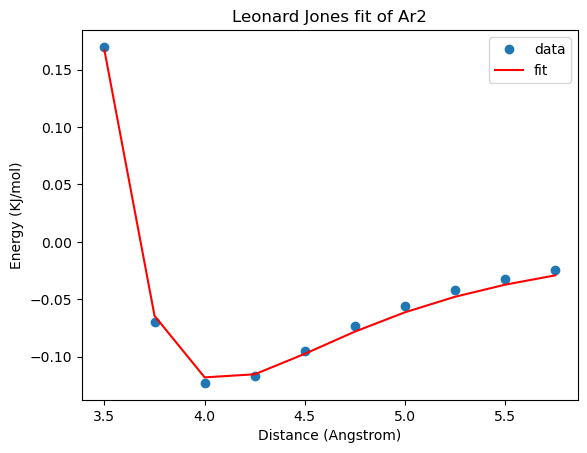

<Figure size 640x480 with 0 Axes>

In [58]:
# define lennard jones potential
def lj(r, eps, sig):
    return 4*eps*((sig/r)**12 - (sig/r)**6)

energy = np.array(list(ecp.values()))
energy_list=[]
for R in Rvals:
    e = ecp[R] * psi4.constants.hartree2kcalmol
    energy_list.append(e)
# fit curve to data
popt, pcov = opt.curve_fit(lj, r, energy_list)

# plot data
plt.plot(r, energy_list, 'o', label='data')
plt.xlabel('Distance (Angstrom)')
plt.ylabel('Energy (Hartree)')
plt.title('Leonard Jones fit of Ar2')
plt.legend()

#Plot the fit
plt.plot(r, lj(r, *popt), 'r-', label='fit')
plt.xlabel('Distance (Angstrom)')
plt.ylabel('Energy (KJ/mol)')
plt.legend()
plt.show()

#Save the plot
plt.savefig('Leonard Jones fit of Ar2.png')
